Programa de Pós Graduação em Engenharia Elétrica |
Universidade Federal da Bahia |
EXTRAÇÃO DE ATRIBUTOS |

Professor: Eduardo Simas |
Alunos:
Mat. 2022120985 - Francisco Cláudio de Q. Nascimento; e
Mat. 2022121623 - Luciano Almeida da Silva


Intalação de Bibliotecas python.
Executar no terminal:
pip install numpy
pip install matplotlib
pip install librosa
pip install pywt
pip install scipy

Comando para verificar bibliotecas intaladas.
Executar no terminal:
pip list

In [4]:
import numpy as np
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
from IPython.display import Audio
import pywt
import emd


Lendo arquivo de audio do PC com biblioteca librosa, exibindo diplay e forma de onda no domínio do tempo.

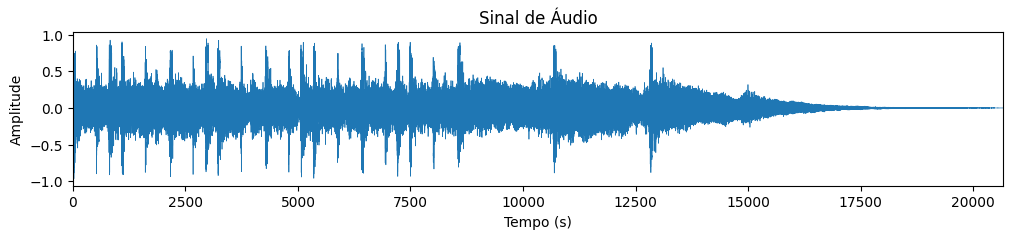

In [5]:
# importando o  áudio
audio_file = 'audio1.mp3'
data, sample_rate = librosa.load(audio_file,sr=None)
# vetor em função do tempo
t = librosa.times_like(data)

# gerando plot do audio
plt.figure(figsize=(12, 2))
plt.plot(t, data, linewidth=0.5)
plt.title('Sinal de Áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim([t.min(), t.max()])
plt.show()

# exibindo diplay do áudio
Audio(data, rate=sample_rate)

Obs.: audio On My Way Home (Sting) disponível em https://studio.youtube.com/channel/UCs_0YWk2hrSyiLK0PrnVkpQ/music

1 - Análise tempo-frequência utilizando STFT e janelas da ordem de 30ms, Observe e comente os efeitos no espectrograma de variar o tipo de janela e o intervalo de tempo entre janelas adjacentes; 
Observado:A escolha dos parâmetros afeta a resolução temporal e espectral. No espectograma o eixo horizontal e o tempo e overtical a frequencia e aintensidade da cor representa a magnitude da energia na frequencia e no tempo, ou seja, as cores estão associadas a intensidade de frequencia e resolução. Janelas com tempos de intervalos menores apresentam maior resolução e com intervalo maior de tempo apresentam uma menor resolução. No espectograma é mostrado como a energia das frequencias variam em função do tempo.


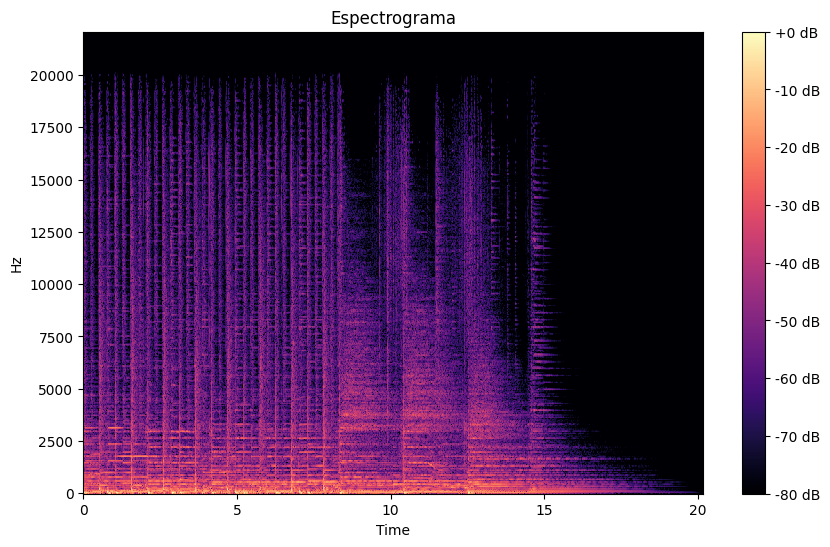

In [6]:
# Parâmetros da STFT
n_fft = int(sample_rate * 0.03)  # Tamanho da janela(30 ms)
hop_length = int(sample_rate * 0.01)  # Intervalo de 10ms entre janelas
window = 'hann' 

# Realizar a STFT
D = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, window=window)

# Gerar spectrograma em dB
DB = librosa.amplitude_to_db(abs(D), ref=np.max)

# Plotando o espectrograma
plt.figure(figsize=(10, 6))
librosa.display.specshow(DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()


2 - Varie a largura da janela entre 10 e 100 ms, observe e comente as diferenças entre os espectrogramas obtidos;
Observa-se que ao variar a largura da janela na STFT estamos relacionando as resoluções temporal e espectral. Alterando a janela pode-se chegar a melhor resolução a ser desejada. Variando-se o intervalo de tempo entre 10 e 100ms observa-se claramente no espectograma que quanto menor o tempo maior a resolução.

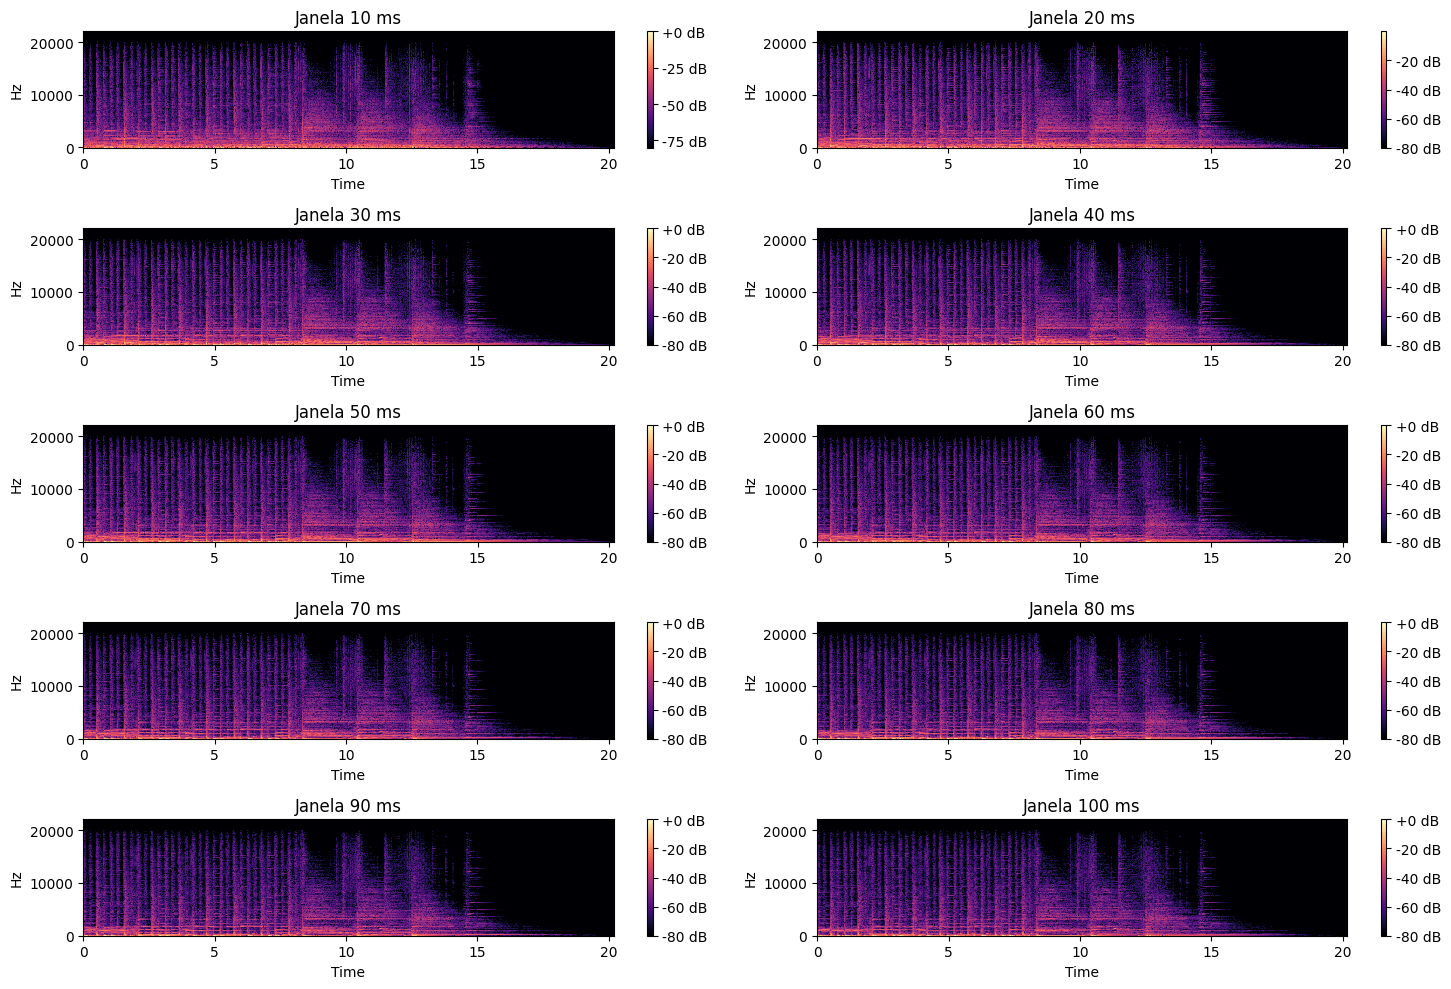

In [7]:

# Array com tamanhos de janela em milissegundos variando de 10 a 100 ms
window_sizes_ms = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.figure(figsize=(15, 10))

for i, window_size_ms in enumerate(window_sizes_ms):
    n_fft = int(sample_rate * (window_size_ms / 1000))
    hop_length = int(n_fft * 0.2)

    # STFT
    D = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, window='hann')

    # Espectrograma em dB
    DB = librosa.amplitude_to_db(abs(D), ref=np.max)

    # Plotando o espectrograma
    plt.subplot(5, 2, i+1)
    librosa.display.specshow(DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Janela {window_size_ms} ms')

plt.tight_layout()
plt.show()

3 - Execute uma decomposição DWT com 8 níveis utilizando a função Daubechies 4 como wavelet-mãe, plote os sinais (original e 8 níveis de decomposição) em uma mesma janela, observe, comente e compare com os resultados obtidos na STFT

Para implementação da decomposição do sinal usa-se, como principal biblioteca python, a pywt. Conforme mostrado nos espectogramas exibidos abaixo, observa-se que a tarefa envolve a aplicação repetida da DWT em uma série de dados originais para decompor os sinais em diferentes componentes de frequência e escala. A wavelet Daubechies 4 (DB4)  é uma das wavelets mais comuns e amplamente usadas na análise de sinais. Dentre as principais aplicações da DWT pode citar Extração de caracteristicas, remoção de ruído e compressão de sinais, funciona como um filtro, analogicamente como uma peneira, e a cada nível o sinal é sub-amostrado em frequencias mais baixas. 

Decomposição em 8 níveis utilizando como wavelet-mãe, Daubechies 4 (DB4)

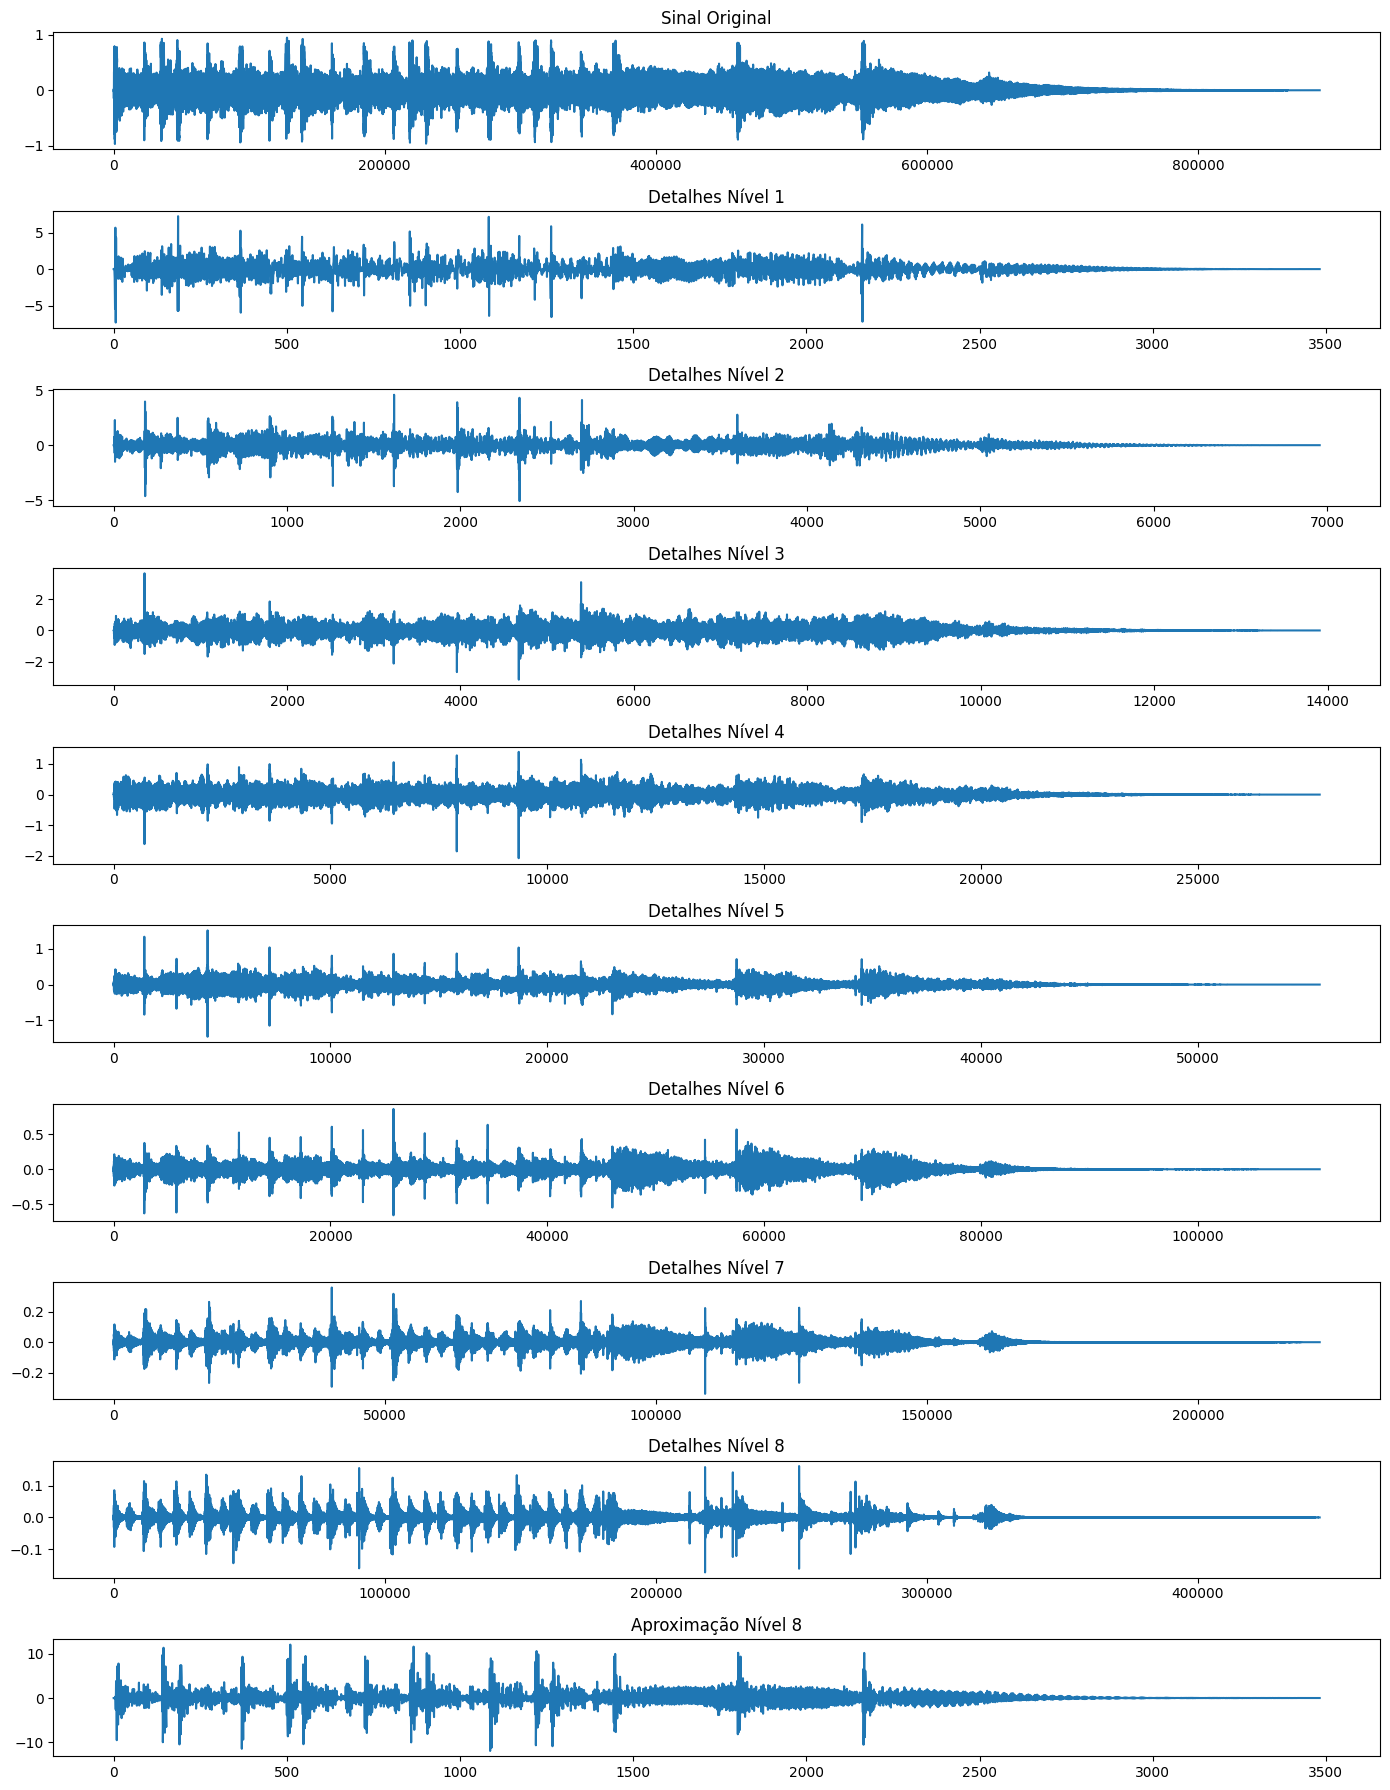

In [8]:
# Decomposição DWT com 8 níveis usando a wavelet Daubechies 4
wavelet = 'db4'
levels = 8
coeffs = pywt.wavedec(data, wavelet, level=levels)

# Aproximação em cada nível
approximations = [coeffs[0]]
details = coeffs[1:]

# Gerando figura para plot dos resultados
plt.figure(figsize=(14, 18))

# Plotando o sinal original
plt.subplot(levels + 2, 1, 1)
plt.plot(data)
plt.title('Sinal Original')

# Plotando cada nível
for i, detail in enumerate(details):
    plt.subplot(levels + 2, 1, i + 2)
    plt.plot(detail)
    plt.title(f'Detalhes Nível {i+1}')

plt.subplot(levels + 2, 1, levels + 2)
plt.plot(approximations[-1])
plt.title(f'Aproximação Nível {levels}')

plt.tight_layout()
plt.show()

4 - Repita o item anterior variando a função wavelet-mãe utilizada 'db1', 'db2', 'db3
Para implementação segue-se a estrutra mostrada na questão anterior. No entanto, usando Wavlet-mãe diferente, no código defindas em um array de wavelets. Em seguida percorre-se por este array efetuando a plotagem da decomposição do sinal nas respectivas wavelets selecionadas, ou seja, as DB1, DB2 e DB3.

variando a função da Wavlet-mãe

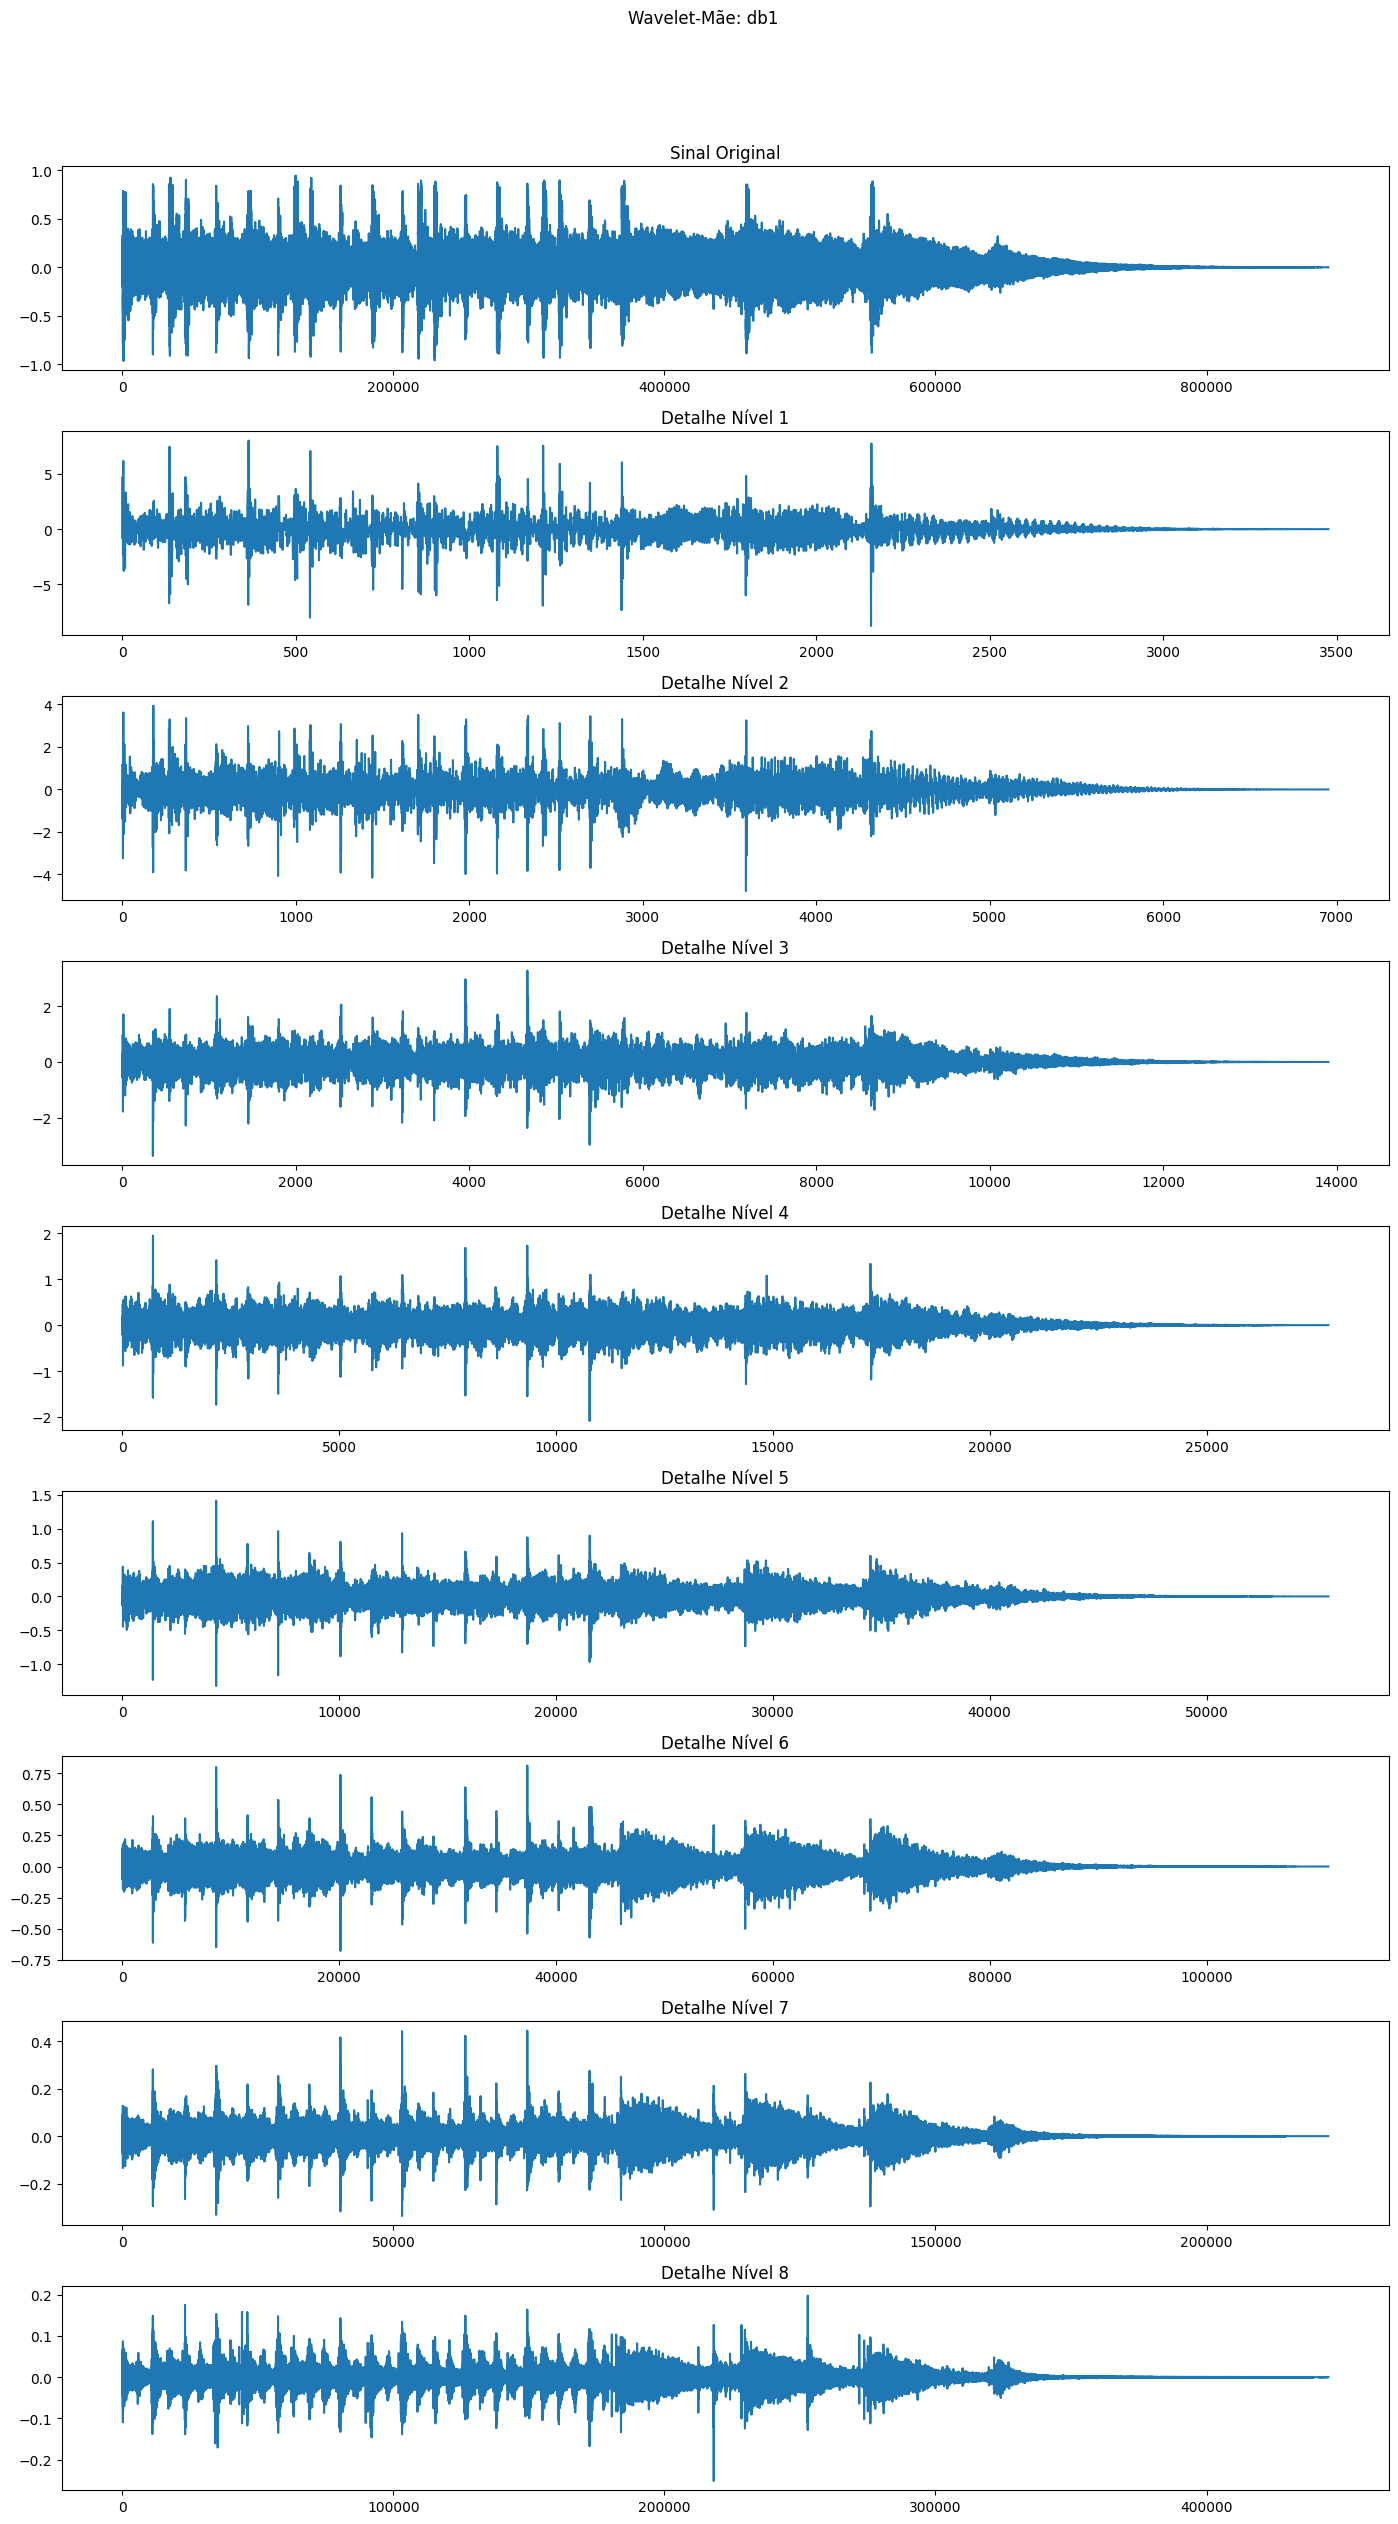

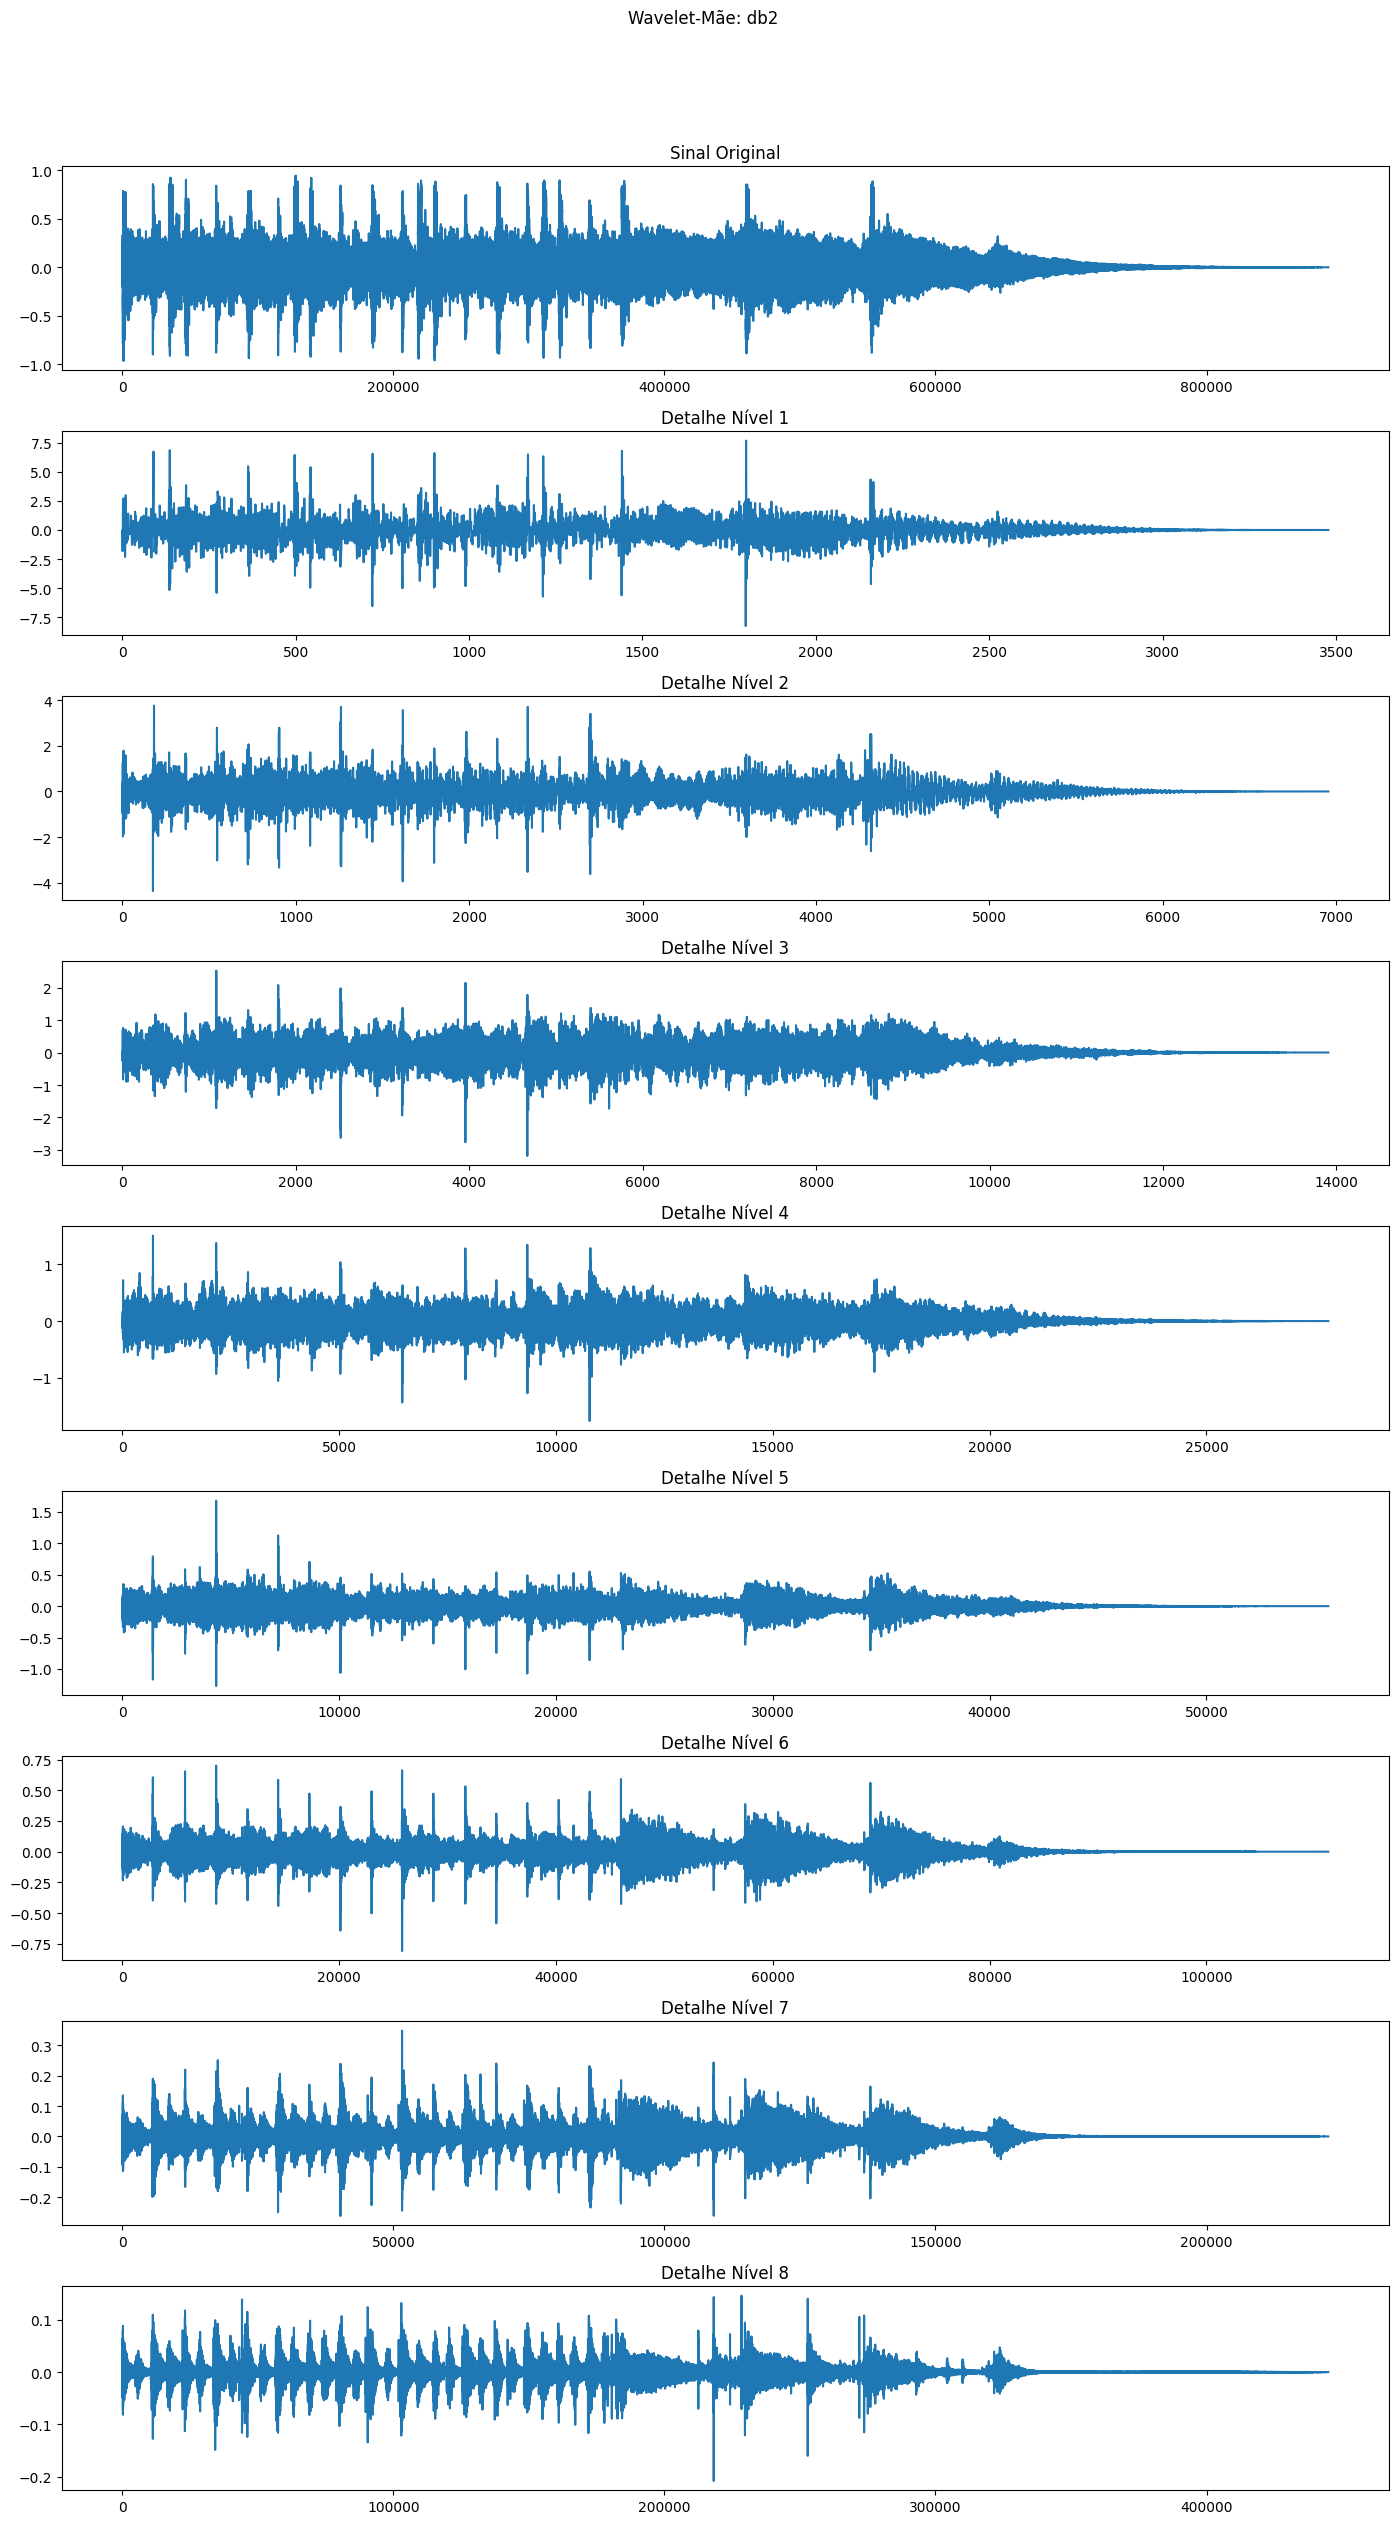

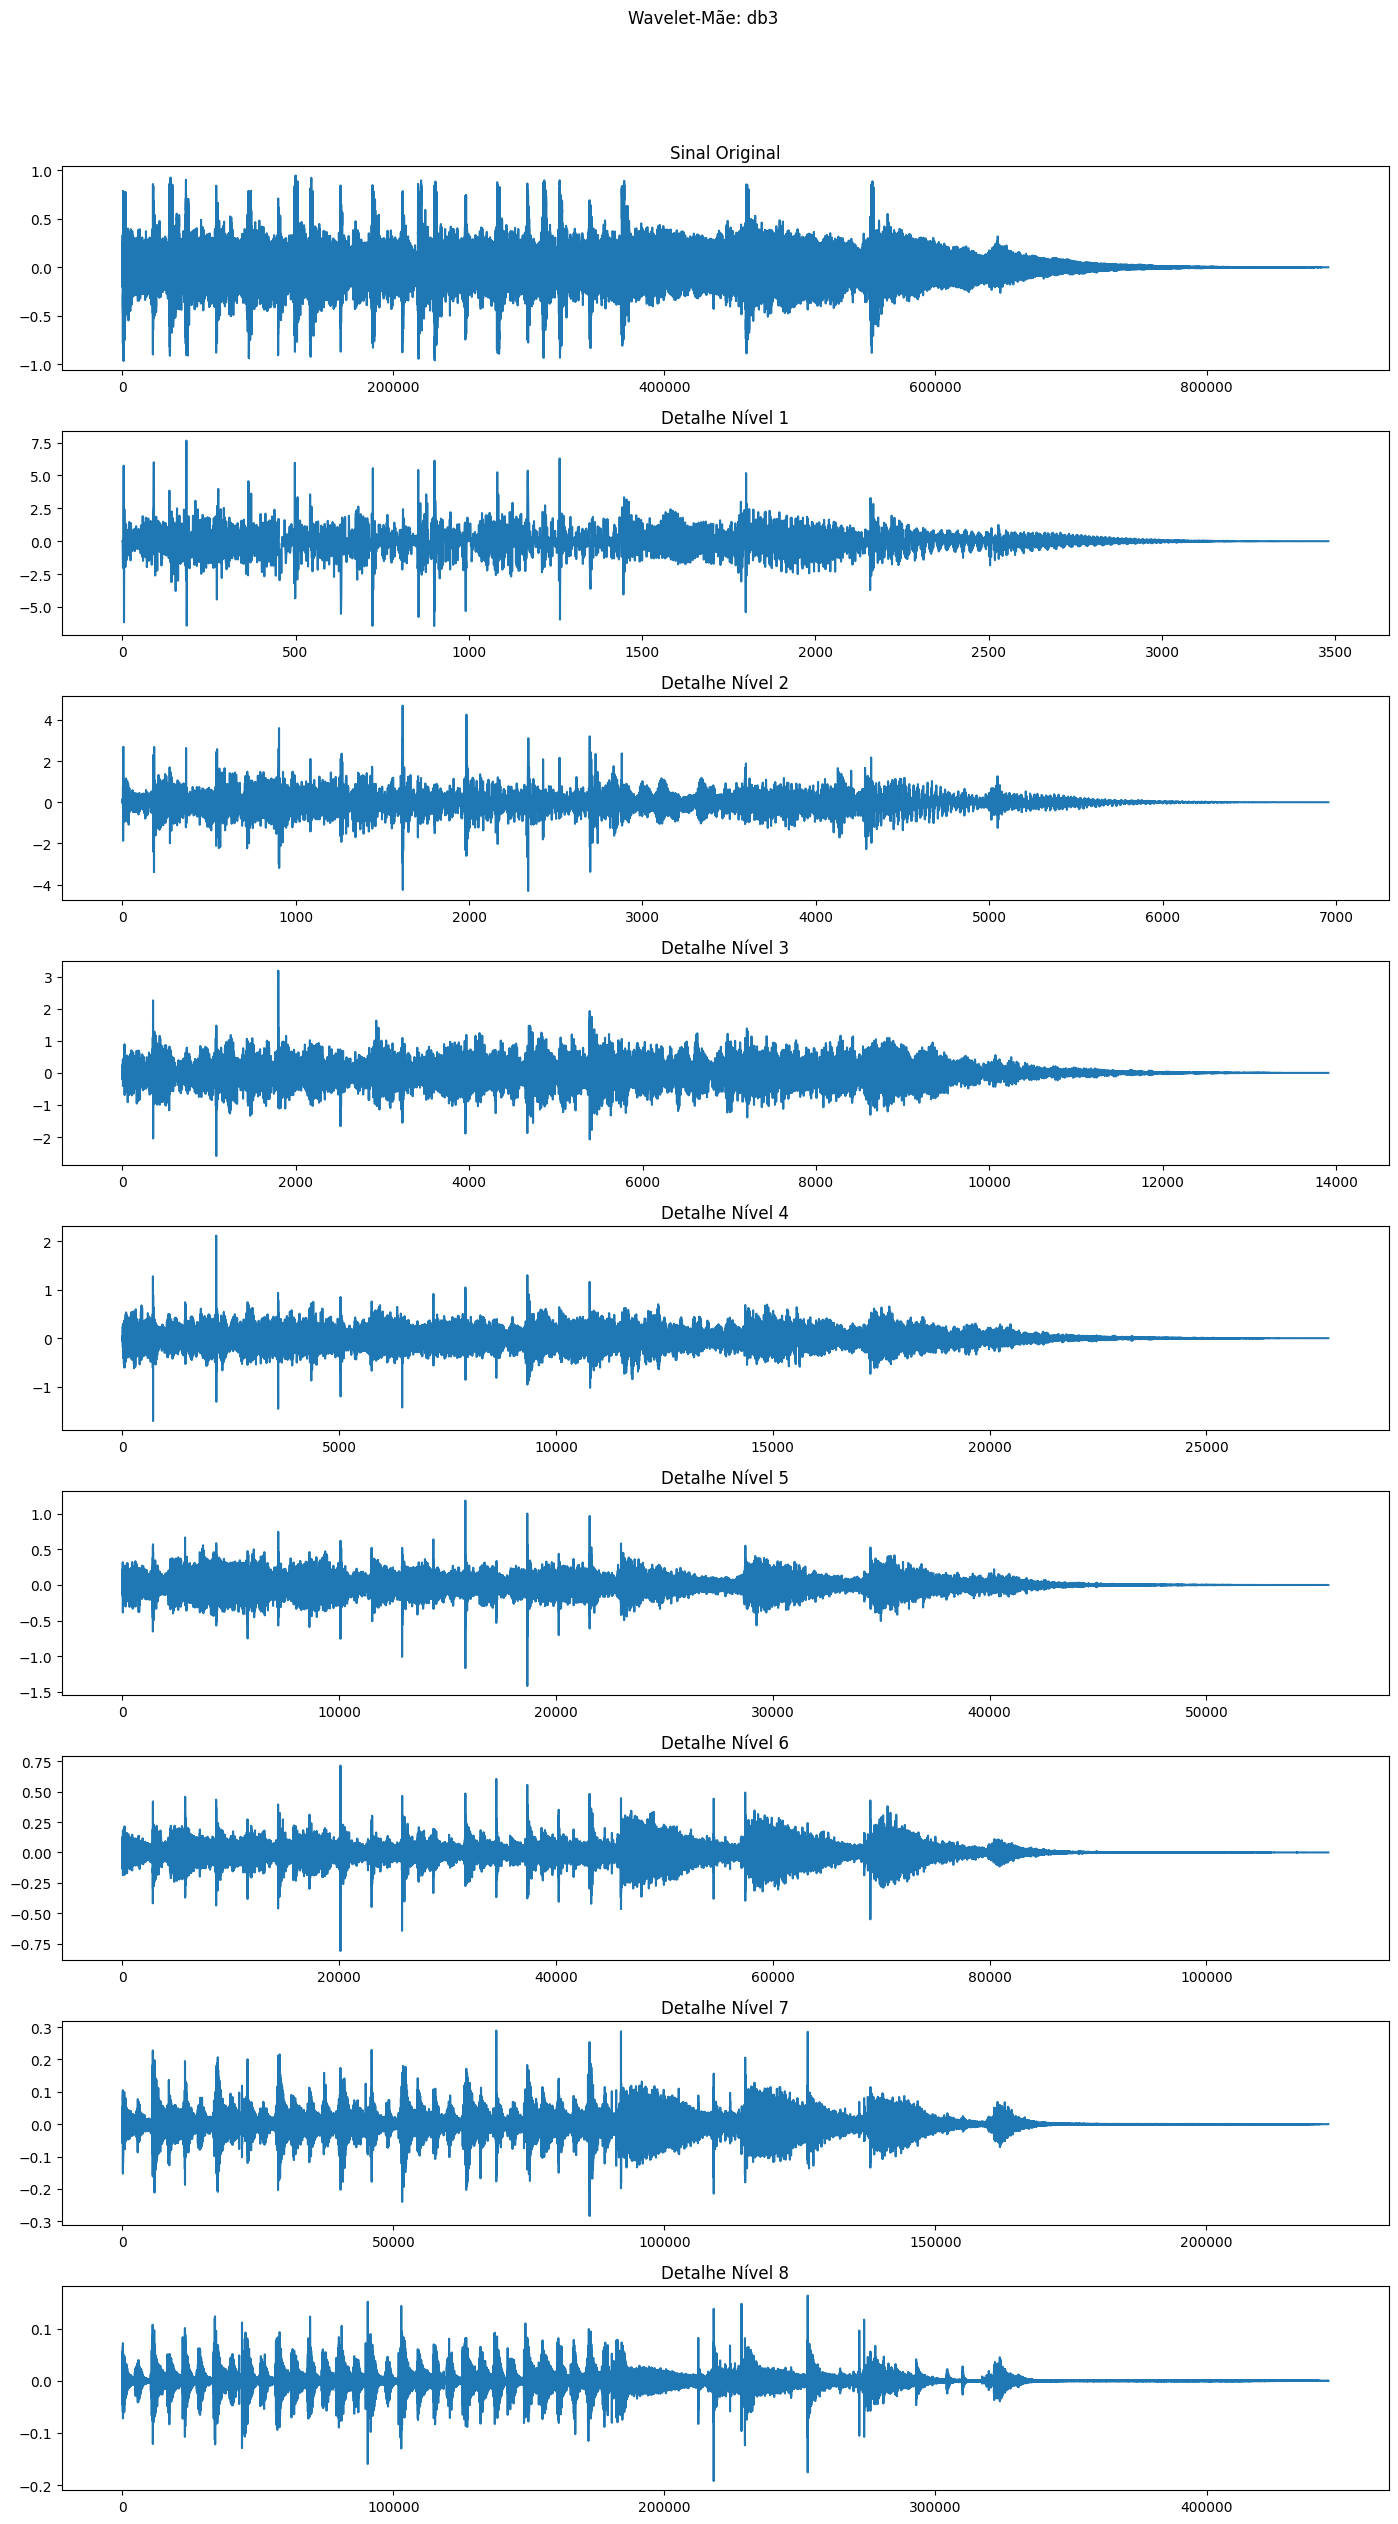

In [9]:
# Array de alguns wavelets-mãe
wavelets = ['db1', 'db2', 'db3']

# Loop das wavelets-mãe definidas acima
for i, wavelet_name in enumerate(wavelets):
    # Decomposição DWT com 8 níveis usando a wavelet atual
    coeffs = pywt.wavedec(data, wavelet_name, level=8)

    # Recuperando os detalhes e a aproximação em cada nível
    approximations = [coeffs[0]]
    details = coeffs[1:]

    # Criando uma figura para cada wavelet-mãe
    plt.figure(figsize=(14, 3 * len(details)))

    # Plotando original
    plt.subplot(len(details) + 1, 1, 1)
    plt.plot(data)
    plt.title('Sinal Original')

    # Plotando o nível em linhas distintas
    for j, detail in enumerate(details):
        plt.subplot(len(details) + 1, 1, j + 2)
        plt.plot(detail)
        plt.title(f'Detalhe Nível {j+1}')

    # Ajustando os espaços entre os subplots
    plt.tight_layout()
    plt.suptitle(f'Wavelet-Mãe: {wavelet_name}', y=1.05)
    plt.show()


5 -Execute uma análise HHT utilizando EMD tradicional para decomposição. Comente e compare com os resultados anteriores para STFT e DWT.
A HHT fornece uma descrição de como a energia dentro de um sinal é distribuído através da frequência. As distribuições são baseadas em frequência instantânea e a amplitude de um sinal.
Faz-se necessário extraímos os FMIs usando um filtro de máscara com as opções padrão e calcular o conteúdo de frequência dos IMFs (Funções de Modo Intrinseco) e retornar a fase instantânea, frequência e amplitude em cada IFM pormeio das linhas de código "imf = emd.sift.mask_sift(x, max_imfs=5)" e "emd.plotting.plot_imfs(imf[:sample_rate*3, :])".
 Como parâmetros padrões usamos uma frequencia de 15hz de pico e uma relação sinal ruido de 0.4.
 No espectograma é mostrado FMI do 1 a 10.
 

A HHT permite ver dinâmicas rápidas em sinais oscilatorios enquenato que od metodod de fourier são capazes de  ver mudanças dinâmicas na transformação em uma janela. A HHT é mais adequada para sinais não-estacionários e não-lineares com mudanças significativas nas características ao longo do tempo, enquanto a STFT é adequada para sinais estacionários ou aproximadamente estacionários.

<Axes: xlabel='Time (samples)'>

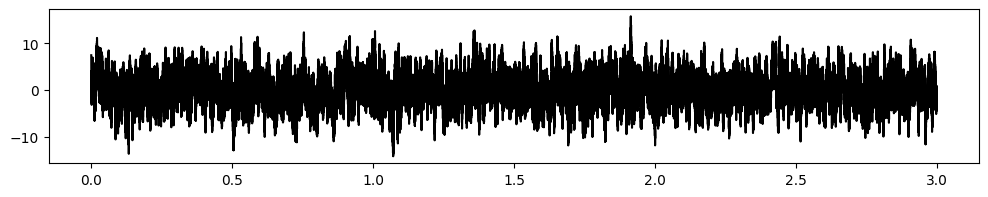

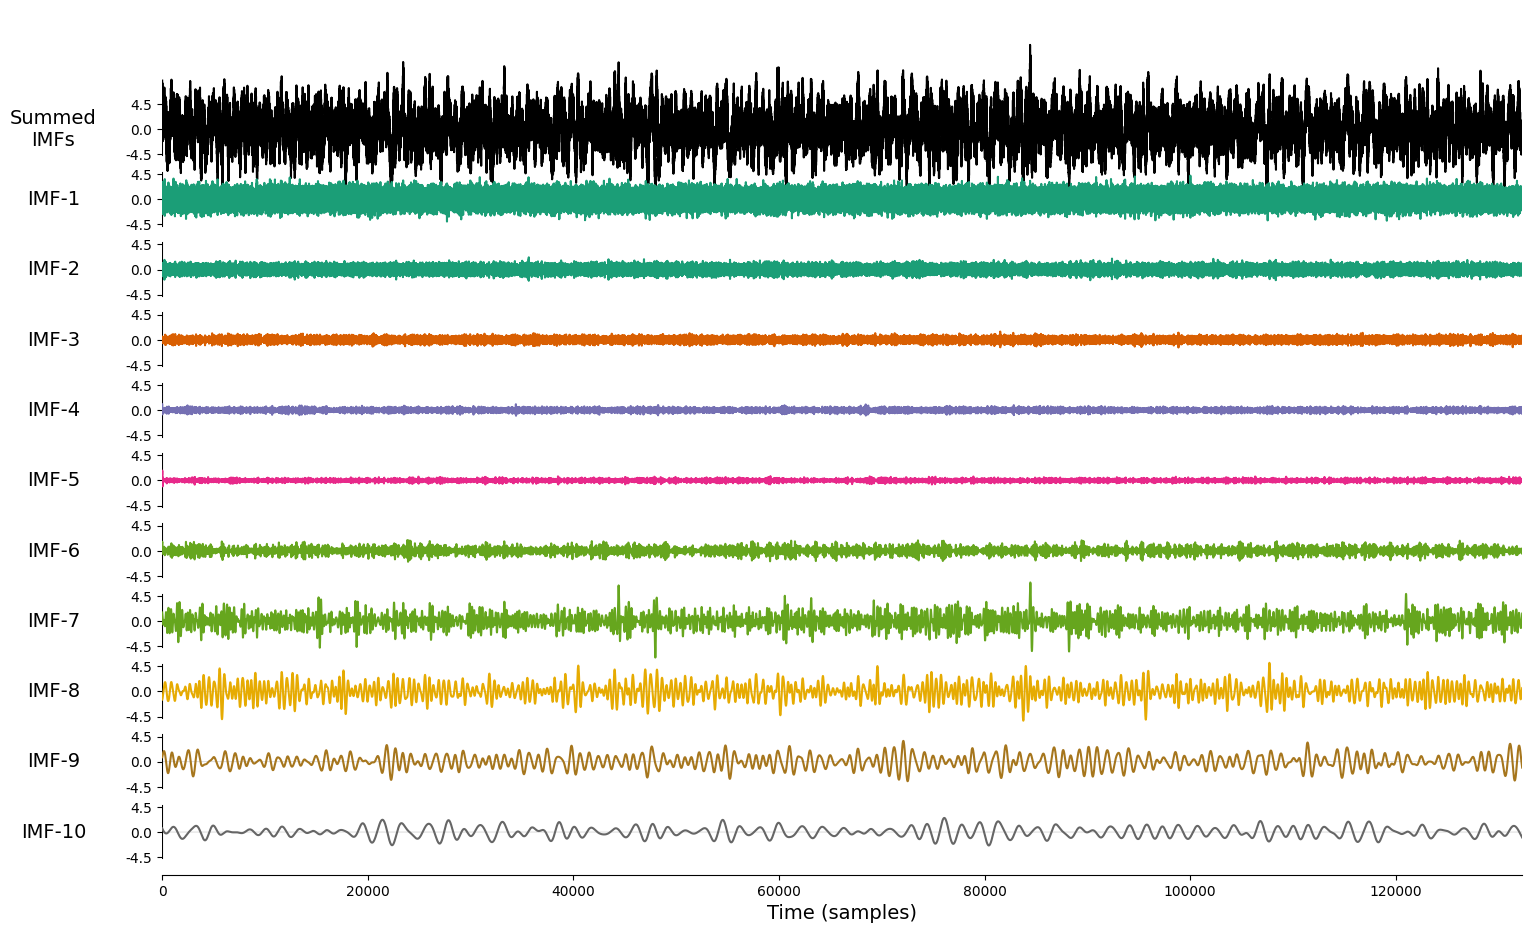

In [10]:
peak_freq = 15
seconds = 20
noise_std = .4
x = emd.simulate.ar_oscillator(peak_freq, sample_rate, seconds,
                               noise_std=noise_std, random_seed=42, r=.96)[:, 0]
x = x*1e-4
t = np.linspace(0, seconds, seconds*sample_rate)

# sphinx_gallery_thumbnail_number = 6


# Plot the first 5 seconds of data
plt.figure(figsize=(12, 2))
plt.plot(t[:sample_rate*3], x[:sample_rate*3], 'k')


imf = emd.sift.mask_sift(x, max_imfs=10)

emd.plotting.plot_imfs(imf[:sample_rate*3, :])

In [11]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht')

In [12]:
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 5, 4)
print('Bin Edges:   {0}'.format(freq_edges))
print('Bin Centres: {0}'.format(freq_centres))
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 50, 8, 'log')

# We round the values to 3dp for easier visualisation
print('Bin Edges:   {0}'.format(np.round(freq_edges, 3)))
print('Bin Centres: {0}'.format(np.round(freq_centres, 3)))

freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 50, 8, 'log')
f, spectrum = emd.spectra.hilberthuang(IF, IA, freq_edges)

f, spectrum = emd.spectra.hilberthuang(IF, IA, (1, 50, 25))

freq_edges, freq_centres = emd.spectra.define_hist_bins(0, 100, 128, 'linear')

# Amplitude weighted HHT per IMF
f, spec_weighted = emd.spectra.hilberthuang(IF, IA, freq_edges, sum_imfs=False)

# Unweighted HHT per IMF - we replace the instantaneous amplitude values with ones
f, spec_unweighted = emd.spectra.hilberthuang(IF, np.ones_like(IA), freq_edges, sum_imfs=False)

Bin Edges:   [1. 2. 3. 4. 5.]
Bin Centres: [1.5 2.5 3.5 4.5]
Bin Edges:   [ 1.     1.631  2.659  4.336  7.071 11.531 18.803 30.662 50.   ]
Bin Centres: [ 1.315  2.145  3.498  5.704  9.301 15.167 24.732 40.331]


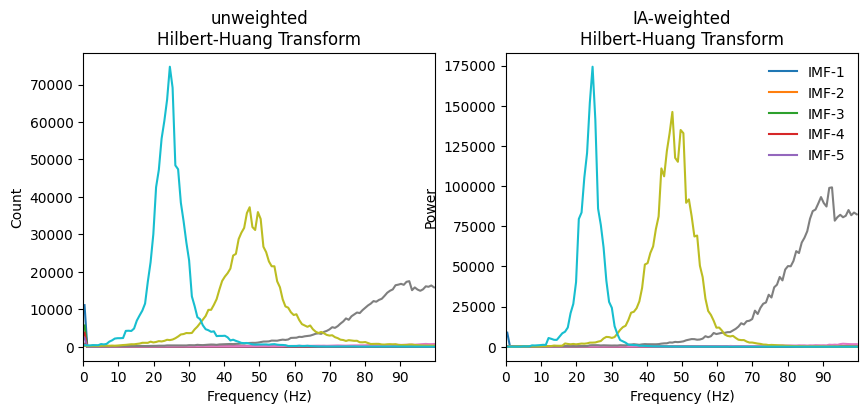

In [13]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=0.4)
plt.subplot(121)
plt.plot(freq_centres, spec_unweighted)
plt.xticks(np.arange(10)*10)
plt.xlim(0, 100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.title('unweighted\nHilbert-Huang Transform')

plt.subplot(122)
plt.plot(freq_centres, spec_weighted)
plt.xticks(np.arange(10)*10)
plt.xlim(0, 100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('IA-weighted\nHilbert-Huang Transform')
plt.legend(['IMF-1', 'IMF-2', 'IMF-3', 'IMF-4', 'IMF-5'], frameon=False)

6 - Repita o item anterior substituindo a EMD por EEMD ou CEEMDAN.
Duarante a implementação do HHT CEEMDAN, mesmo após o uso de diversas bibliotecas python, não foi possível aexibição da plotage dos sinais decompostos. Apresentava sempre o mesmo erro de "ModuleNotFoundError", ou seja, biblioteca não instalada. No entanto ao executar no terminal o pip list, verifcamos que as biliotecas estavam instaladas. chegando a conclusão que seria necessário a implementação manual, o que demandaria tempo de criação de um algoritimo especifico.
As diversas bibliotecas que previam a utilização, seja EEMD ou CEEMDAN, testadas nessa atividade, foram as: pyemd, PyEMD, PyEMD-Signal, pyhht e hhtpy.
Abaixo temos a implementação lógica, no entando para funconamento seria necessa´rio analisar o código fonte da propria biblioteca. 

Referente a transformada CEEMDAN (Complete Ensemble Empirical Mode Decomposition with Adaptive Noise), a principal inovação da  em relação à EMD padrão é a inclusão de um processo de adaptação de ruído para melhorar a decomposição, sendo útil para a análise de sinais complexos em que o ruído pode obscurecer componentes importantes.

In [14]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from pyemd import CEEMDAN

# Carregar o arquivo de áudio
audio_file = 'audio.wav'  
sample_rate, audio_data = wavfile.read(audio_file)

# Certifique-se de que o áudio seja mono (um único canal)
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# Normalizar o áudio para valores entre -1 e 1
audio_data = audio_data.astype(np.float32)
audio_data /= np.max(np.abs(audio_data))

# Criar um vetor de tempo para o áudio
time = np.arange(len(audio_data)) / sample_rate

# Aplicar a CEEMDAN ao áudio
ceemdan = CEEMDAN()
ceemdan_results = ceemdan(audio_data, max_imf=-1)

# Plotar as IMFs resultantes da CEEMDAN
num_imfs = len(ceemdan_results)
plt.figure(figsize=(12, 8))
for i, imf in enumerate(ceemdan_results):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(time, imf)
    plt.title(f'CEEMDAN IMF {i + 1}')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'PyEMD'